Import packages

In [1]:
import os
import numpy as np
import cv2
import math
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from keras.models import Model

Load data

In [3]:
#training set
X=[]
def ReFileName(dirPath):

    for file in os.listdir(dirPath):
        if os.path.isfile(os.path.join(dirPath, file)) == True:
            c= os.path.basename(file)
            name = dirPath + '\\' + c
            img = cv2.imread(name)
            img = cv2.resize(img,(100,100))
            X.append(img)

dirPath = r"D:\Academic\PhD\Research\data\FOOTBALLTRAIN"
ReFileName(dirPath)
X=np.array(X)
print('x.shape',X.shape)
#y=[1 for i in range(len(cat))]
#y=np.array(y)
#print('y.shape',y.shape)
X = X.astype('float32')
X /= 255
print(X)

x.shape (300, 100, 100, 3)
[[[[0.32156864 0.5529412  0.44313726]
   [0.31764707 0.54901963 0.44313726]
   [0.32156864 0.5568628  0.44705883]
   ...
   [0.40784314 0.63529414 0.53333336]
   [0.39215687 0.61960787 0.50980395]
   [0.3882353  0.6156863  0.5019608 ]]

  [[0.31764707 0.54509807 0.43529412]
   [0.3137255  0.54509807 0.43529412]
   [0.3137255  0.54509807 0.42745098]
   ...
   [0.39607844 0.62352943 0.5137255 ]
   [0.4        0.627451   0.5176471 ]
   [0.4        0.62352943 0.50980395]]

  [[0.32156864 0.5372549  0.43137255]
   [0.3254902  0.5529412  0.4392157 ]
   [0.34117648 0.57254905 0.45490196]
   ...
   [0.39607844 0.62352943 0.50980395]
   [0.39607844 0.62352943 0.50980395]
   [0.4117647  0.627451   0.5137255 ]]

  ...

  [[0.33333334 0.5137255  0.4       ]
   [0.32941177 0.50980395 0.4       ]
   [0.3372549  0.5137255  0.40784314]
   ...
   [0.27450982 0.4862745  0.37254903]
   [0.27450982 0.4862745  0.37254903]
   [0.27450982 0.4862745  0.37254903]]

  [[0.34509805 0.5

In [4]:
#Validation set
X_valid=[]
def ReFileName(dirPath):

    for file in os.listdir(dirPath):
        if os.path.isfile(os.path.join(dirPath, file)) == True:
            c= os.path.basename(file)
            name = dirPath + '\\' + c
            img = cv2.imread(name)
            img = cv2.resize(img,(100,100))
            X_valid.append(img)

dirPath = r"D:\Academic\PhD\Research\data\FOOTBALLVAL"
ReFileName(dirPath)
X_valid=np.array(X_valid)
print('X_valid.shape',X_valid.shape)

X_valid = X_valid.astype('float32')
X_valid /= 255
X_valid

X_valid.shape (300, 100, 100, 3)


array([[[[0.30980393, 0.30588236, 0.34509805],
         [0.34901962, 0.3647059 , 0.4       ],
         [0.28627452, 0.29803923, 0.33333334],
         ...,
         [0.36078432, 0.21568628, 0.27450982],
         [0.3647059 , 0.21960784, 0.27450982],
         [0.42352942, 0.28235295, 0.3254902 ]],

        [[0.35686275, 0.40392157, 0.42745098],
         [0.40392157, 0.45882353, 0.49411765],
         [0.36078432, 0.3764706 , 0.41568628],
         ...,
         [0.2509804 , 0.15686275, 0.19607843],
         [0.24313726, 0.14117648, 0.18039216],
         [0.3529412 , 0.2627451 , 0.3019608 ]],

        [[0.3647059 , 0.40392157, 0.41960785],
         [0.3764706 , 0.40392157, 0.43137255],
         [0.28235295, 0.2627451 , 0.29803923],
         ...,
         [0.23137255, 0.19215687, 0.22352941],
         [0.24313726, 0.20392157, 0.23137255],
         [0.33333334, 0.29411766, 0.3254902 ]],

        ...,

        [[0.2901961 , 0.5137255 , 0.48235294],
         [0.2901961 , 0.5137255 , 0.48235294]

In [5]:
#Test set
X_test=[]
def ReFileName(dirPath):

    for file in os.listdir(dirPath):
        if os.path.isfile(os.path.join(dirPath, file)) == True:
            c= os.path.basename(file)
            name = dirPath + '\\' + c
            img = cv2.imread(name)
            img = cv2.resize(img,(100,100))
            X_test.append(img)

dirPath = r"D:\Academic\PhD\Research\data\FOOTBALLTEST"
ReFileName(dirPath)
X_test=np.array(X_test)
print('X_test.shape',X_test.shape)

X_test = X_test.astype('float32')
X_test /= 255
X_test

X_test.shape (300, 100, 100, 3)


array([[[[0.3647059 , 0.53333336, 0.42745098],
         [0.3529412 , 0.52156866, 0.41960785],
         [0.34117648, 0.5176471 , 0.4117647 ],
         ...,
         [0.36078432, 0.5529412 , 0.44313726],
         [0.3647059 , 0.5529412 , 0.44313726],
         [0.3372549 , 0.5294118 , 0.41960785]],

        [[0.3647059 , 0.54509807, 0.43529412],
         [0.35686275, 0.53333336, 0.42745098],
         [0.3529412 , 0.5254902 , 0.42352942],
         ...,
         [0.34117648, 0.5294118 , 0.41960785],
         [0.34901962, 0.5372549 , 0.42745098],
         [0.3529412 , 0.54901963, 0.43137255]],

        [[0.32941177, 0.5176471 , 0.40784314],
         [0.34117648, 0.5137255 , 0.40784314],
         [0.3372549 , 0.50980395, 0.40392157],
         ...,
         [0.3254902 , 0.5176471 , 0.40784314],
         [0.31764707, 0.5058824 , 0.39607844],
         [0.3137255 , 0.5019608 , 0.39215687]],

        ...,

        [[0.27450982, 0.4509804 , 0.34509805],
         [0.27058825, 0.45882353, 0.34901962]

In [7]:
#labels
joint = pd.read_table('D:\\Academic\\PhD\\Research\\data\\annotation.txt',sep='\t',header=None) 
print('joint:',joint)###28
joint.shape
y = joint[0:8400]
y_valid = joint[28000:36400]
y_test = joint[42000:50400]
y = np.array(y).reshape(300,28)
y_valid = np.array(y_valid).reshape(300,28)
y_test = np.array(y_test).reshape(300,28)
print('training labels:',y.shape,y)
print('valid labels:',y_valid.shape,y_valid)
print('test labels:',y_test.shape,y_test)

joint:                  0
0       113.179460
1       190.348840
2       149.765850
3       174.206010
4       117.253180
...            ...
165391   91.708069
165392  122.023640
165393   55.353383
165394  123.006200
165395   26.367890

[165396 rows x 1 columns]
training labels: (300, 28) [[113.17946  190.34884  149.76585  ...  55.243498 120.87495   23.803406]
 [112.25941  215.10338  104.37399  ...  52.959217 132.6653    25.552005]
 [119.72134  202.61183   92.456121 ...  56.666829 123.05655   32.760247]
 ...
 [ 41.189561 202.71072   78.477396 ...  66.004565 153.35773   46.535679]
 [100.47772  182.45596   99.052139 ...  60.74594  124.17683   29.340081]
 [194.98192  185.9126   159.4142   ...  69.009561  90.619825  48.072141]]
valid labels: (300, 28) [[ 99.823371 182.64571   95.924009 ...  60.205751 130.83599   29.233269]
 [165.95993  194.75333  134.47404  ...  50.490728 123.1588    20.989021]
 [ 87.236669 155.25626  145.06873  ...  61.662732 134.45737   34.500147]
 ...
 [111.98541  188.62

In [8]:
y_a = y/2.5
y_valid_a = y_valid/2.5
y_test_a = y_test/2.5

Bulid and run model

In [9]:
y_prediction = []
euclidean_dis = []
N = 10
for i in range(N):
    model = Sequential()
    model.add(Conv2D(filters=96,kernel_size=11,strides=4,activation='relu',input_shape=(100, 100, 3)))
    model.add(MaxPool2D(pool_size=3, strides=2))
    model.add(Conv2D(filters=256,kernel_size=5,padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=3, strides=2))
    model.add(Conv2D(filters=384,kernel_size=3,padding='same',activation='relu'))
    model.add(Conv2D(filters=384,kernel_size=3,padding='same',activation='relu'))
    model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=3, strides=2))
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(28))
    
    model.compile(
              'Adam',
              loss= 'mse',
              metrics=['MeanAbsoluteError'])
    print("========start loop",i,"============")
    history = model.fit(X,y_a,
           batch_size=50,
           epochs=30,
           verbose=2,
           validation_data=(X_valid[0:50],y_valid_a[0:50]))
    print("========end============")
    
    layer_model_train = Model(inputs = model.input,outputs = model.layers[-1].output)
    feature_test = layer_model_train.predict(X_test)
    y_pred = model.predict(X_test)
    y_prediction.append(y_pred)
    
    diff = (y_test_a-y_pred)**2
    diff = diff.reshape((300,14,2))
    eu_dis = np.empty((300,14))
    for i in range(300):
        for j in range(14):
            eu_dis[i][j] = np.sqrt(sum(diff[i][j]))
    #eu_dis
    avg_eu_dis = []#each picture
    for i in range(eu_dis.shape[0]):
        avg_eu_dis.append(np.mean(eu_dis[i,:]))
    #print('avg eu dis in each picture:',avg_eu_dis,'\n','#test picture:',len(avg_eu_dis),'\n','overall_avg:',np.mean(avg_eu_dis))
    euclidean_dis.append(np.mean(avg_eu_dis))
print(np.mean(euclidean_dis))

========start loop 0 ============
Epoch 1/30
6/6 - 5s - loss: 13597.7422 - mean_absolute_error: 79.1213 - val_loss: 2431.0457 - val_mean_absolute_error: 46.6362 - 5s/epoch - 793ms/step
Epoch 2/30
6/6 - 2s - loss: 2543.1147 - mean_absolute_error: 47.7383 - val_loss: 2425.9517 - val_mean_absolute_error: 46.5887 - 2s/epoch - 354ms/step
Epoch 3/30
6/6 - 2s - loss: 2506.0945 - mean_absolute_error: 47.3903 - val_loss: 2236.6965 - val_mean_absolute_error: 44.6827 - 2s/epoch - 363ms/step
Epoch 4/30
6/6 - 2s - loss: 1435.1392 - mean_absolute_error: 32.9112 - val_loss: 1231.9639 - val_mean_absolute_error: 33.4001 - 2s/epoch - 352ms/step
Epoch 5/30
6/6 - 2s - loss: 504.6780 - mean_absolute_error: 18.6342 - val_loss: 532.5798 - val_mean_absolute_error: 21.6188 - 2s/epoch - 356ms/step
Epoch 6/30
6/6 - 2s - loss: 346.0388 - mean_absolute_error: 16.0236 - val_loss: 317.6990 - val_mean_absolute_error: 13.6122 - 2s/epoch - 363ms/step
Epoch 7/30
6/6 - 2s - loss: 172.6280 - mean_absolute_error: 10.0352 -

Epoch 27/30
6/6 - 3s - loss: 66.6825 - mean_absolute_error: 6.0926 - val_loss: 87.8364 - val_mean_absolute_error: 6.4267 - 3s/epoch - 462ms/step
Epoch 28/30
6/6 - 3s - loss: 68.5378 - mean_absolute_error: 6.2390 - val_loss: 83.5829 - val_mean_absolute_error: 6.4646 - 3s/epoch - 460ms/step
Epoch 29/30
6/6 - 3s - loss: 65.4842 - mean_absolute_error: 6.0626 - val_loss: 89.1279 - val_mean_absolute_error: 6.4215 - 3s/epoch - 461ms/step
Epoch 30/30
6/6 - 3s - loss: 66.9609 - mean_absolute_error: 6.1055 - val_loss: 83.8984 - val_mean_absolute_error: 6.2811 - 3s/epoch - 463ms/step
========end============
========start loop 2 ============
Epoch 1/30
6/6 - 3s - loss: 3122.6128 - mean_absolute_error: 51.6212 - val_loss: 2429.8181 - val_mean_absolute_error: 46.6250 - 3s/epoch - 560ms/step
Epoch 2/30
6/6 - 3s - loss: 2507.5305 - mean_absolute_error: 47.4036 - val_loss: 2006.4084 - val_mean_absolute_error: 42.2966 - 3s/epoch - 470ms/step
Epoch 3/30
6/6 - 3s - loss: 1354.5250 - mean_absolute_error: 2

Epoch 23/30
6/6 - 3s - loss: 69.9454 - mean_absolute_error: 6.2925 - val_loss: 84.5773 - val_mean_absolute_error: 6.3025 - 3s/epoch - 511ms/step
Epoch 24/30
6/6 - 3s - loss: 69.9165 - mean_absolute_error: 6.3143 - val_loss: 82.8393 - val_mean_absolute_error: 6.2824 - 3s/epoch - 508ms/step
Epoch 25/30
6/6 - 3s - loss: 68.8862 - mean_absolute_error: 6.2429 - val_loss: 85.3940 - val_mean_absolute_error: 6.3359 - 3s/epoch - 510ms/step
Epoch 26/30
6/6 - 3s - loss: 69.4557 - mean_absolute_error: 6.2606 - val_loss: 86.7838 - val_mean_absolute_error: 6.4183 - 3s/epoch - 505ms/step
Epoch 27/30
6/6 - 3s - loss: 69.5695 - mean_absolute_error: 6.2658 - val_loss: 83.3630 - val_mean_absolute_error: 6.3370 - 3s/epoch - 507ms/step
Epoch 28/30
6/6 - 3s - loss: 68.0109 - mean_absolute_error: 6.2025 - val_loss: 83.0669 - val_mean_absolute_error: 6.2957 - 3s/epoch - 510ms/step
Epoch 29/30
6/6 - 3s - loss: 67.2567 - mean_absolute_error: 6.1293 - val_loss: 86.0470 - val_mean_absolute_error: 6.3481 - 3s/epoc

Epoch 19/30
6/6 - 4s - loss: 86.2122 - mean_absolute_error: 7.0342 - val_loss: 104.0384 - val_mean_absolute_error: 7.7446 - 4s/epoch - 585ms/step
Epoch 20/30
6/6 - 4s - loss: 86.0092 - mean_absolute_error: 7.0487 - val_loss: 97.0528 - val_mean_absolute_error: 7.0959 - 4s/epoch - 624ms/step
Epoch 21/30
6/6 - 4s - loss: 86.1543 - mean_absolute_error: 7.0201 - val_loss: 102.7933 - val_mean_absolute_error: 7.6705 - 4s/epoch - 591ms/step
Epoch 22/30
6/6 - 4s - loss: 83.2334 - mean_absolute_error: 6.9570 - val_loss: 96.5604 - val_mean_absolute_error: 7.1833 - 4s/epoch - 619ms/step
Epoch 23/30
6/6 - 4s - loss: 82.0027 - mean_absolute_error: 6.8488 - val_loss: 130.5615 - val_mean_absolute_error: 9.2129 - 4s/epoch - 608ms/step
Epoch 24/30
6/6 - 4s - loss: 90.5821 - mean_absolute_error: 7.2410 - val_loss: 96.0014 - val_mean_absolute_error: 7.0546 - 4s/epoch - 611ms/step
Epoch 25/30
6/6 - 4s - loss: 81.3064 - mean_absolute_error: 6.8067 - val_loss: 121.1218 - val_mean_absolute_error: 8.7959 - 4s/

Epoch 15/30
6/6 - 4s - loss: 79.0261 - mean_absolute_error: 6.7362 - val_loss: 87.8897 - val_mean_absolute_error: 6.4154 - 4s/epoch - 599ms/step
Epoch 16/30
6/6 - 4s - loss: 78.7864 - mean_absolute_error: 6.7858 - val_loss: 84.1147 - val_mean_absolute_error: 6.4807 - 4s/epoch - 591ms/step
Epoch 17/30
6/6 - 4s - loss: 77.5856 - mean_absolute_error: 6.6936 - val_loss: 84.7234 - val_mean_absolute_error: 6.3517 - 4s/epoch - 589ms/step
Epoch 18/30
6/6 - 4s - loss: 80.4063 - mean_absolute_error: 6.8154 - val_loss: 84.5890 - val_mean_absolute_error: 6.3315 - 4s/epoch - 586ms/step
Epoch 19/30
6/6 - 4s - loss: 74.7676 - mean_absolute_error: 6.5337 - val_loss: 92.4885 - val_mean_absolute_error: 6.6148 - 4s/epoch - 584ms/step
Epoch 20/30
6/6 - 4s - loss: 78.1630 - mean_absolute_error: 6.6775 - val_loss: 87.2785 - val_mean_absolute_error: 6.3368 - 4s/epoch - 584ms/step
Epoch 21/30
6/6 - 4s - loss: 75.4808 - mean_absolute_error: 6.6036 - val_loss: 85.7292 - val_mean_absolute_error: 6.3712 - 4s/epoc

Epoch 11/30
6/6 - 4s - loss: 112.3961 - mean_absolute_error: 8.2173 - val_loss: 139.5847 - val_mean_absolute_error: 9.6312 - 4s/epoch - 621ms/step
Epoch 12/30
6/6 - 4s - loss: 101.7964 - mean_absolute_error: 7.7983 - val_loss: 113.9489 - val_mean_absolute_error: 8.4030 - 4s/epoch - 629ms/step
Epoch 13/30
6/6 - 4s - loss: 105.3439 - mean_absolute_error: 7.9764 - val_loss: 104.6109 - val_mean_absolute_error: 7.7519 - 4s/epoch - 633ms/step
Epoch 14/30
6/6 - 4s - loss: 100.3113 - mean_absolute_error: 7.6884 - val_loss: 110.2939 - val_mean_absolute_error: 8.1793 - 4s/epoch - 673ms/step
Epoch 15/30
6/6 - 4s - loss: 102.5430 - mean_absolute_error: 7.7581 - val_loss: 115.5850 - val_mean_absolute_error: 8.4648 - 4s/epoch - 638ms/step
Epoch 16/30
6/6 - 4s - loss: 96.3712 - mean_absolute_error: 7.5305 - val_loss: 114.5494 - val_mean_absolute_error: 8.4007 - 4s/epoch - 607ms/step
Epoch 17/30
6/6 - 4s - loss: 93.4447 - mean_absolute_error: 7.4375 - val_loss: 107.8033 - val_mean_absolute_error: 8.03

In [10]:
import scipy.stats as st
st.t.interval(alpha=0.90, df=len(euclidean_dis)-1,
              loc=np.mean(euclidean_dis),
              scale=st.sem(euclidean_dis))

(8.622935897294287, 9.913543458201445)

In [12]:
std_dis=np.std(euclidean_dis,ddof=0)
standard_error=std_dis/math.sqrt(len(euclidean_dis))
standard_error

0.3339613767270494

Visualization

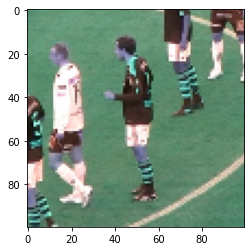

In [40]:
rand_num = 222
result = np.mean(y_prediction,axis=0)
fig = plt.imshow(X_test[rand_num])
#plt.savefig('fig8.png')

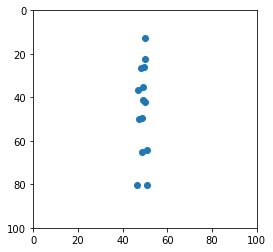

In [41]:
Y = result.reshape(300,14,2)
a = Y[rand_num][:,0]
aa = list(reversed(a))
b = Y[rand_num][:,1]
bb = list(reversed(b))
plt.figure(figsize=(4,4))
plt.xlim(0,100)
plt.ylim(100,0)
pic = plt.scatter(aa,bb)
#plt.savefig('alexrelu.png')

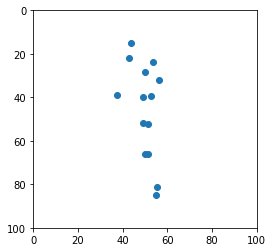

In [42]:
Y = y_test.reshape(300,14,2)
a = (Y/2.5)[rand_num][:,0]
aa = list(reversed(a))
b = (Y/2.5)[rand_num][:,1]
bb = list(reversed(b))
plt.figure(figsize=(4,4))
plt.xlim(0,100)
plt.ylim(100,0)
pic = plt.scatter(aa,bb)
#plt.savefig('true.png')

Visualization

In [43]:
loss_object =tf.keras.losses.MeanSquaredError()
def create_adversarial_pattern(input_image, input_label):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = loss_object(input_label, prediction)
    gradient = tape.gradient(loss, input_image)
    signed_grad = tf.sign(gradient)
    return signed_grad

In [44]:
x = X-0.5
x_valid = X_valid-0.5
x_test = X_test-0.5

In [45]:
x_test = tf.convert_to_tensor(x_test, tf.float32, name='x_test')
yy_test = tf.convert_to_tensor(y_test, tf.float32, name='y_test')
perturbations = create_adversarial_pattern(x_test, yy_test)
perturbations[0].shape

TensorShape([100, 100, 3])

In [47]:
def display_images(image, label,adv_label,num=10):
    fig = plt.figure(figsize=(2*num,3))
    for i in range(num):  
        plt.subplot(1,num,i+1) 
        plt.imshow((image[i,:,:,:] + 1)/2)
        plt.axis('off')
    plt.show()

epsilons = 0:
the sum of euclidean_dis of all joint points: 0.0


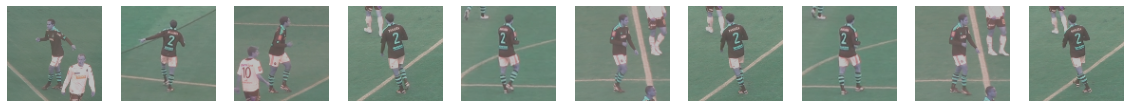

epsilons = 0.1:
the sum of euclidean_dis of all joint points: 7.954131660055063


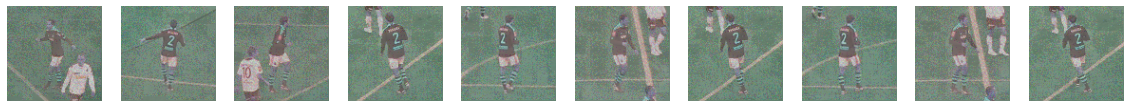

epsilons = 0.2:
the sum of euclidean_dis of all joint points: 5.669866325603987


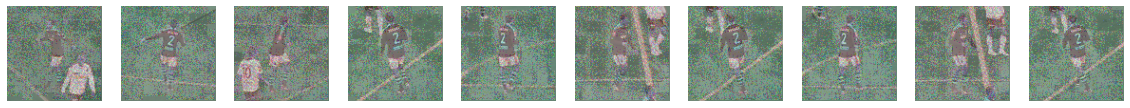

epsilons = 0.3:
the sum of euclidean_dis of all joint points: 5.000821419564972


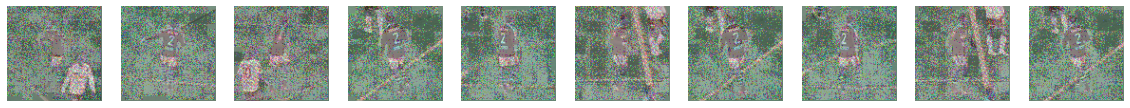

In [48]:
epsilons = [0,0.10,0.20,0.30]
euclidean_dis_adv = []
for i, eps in enumerate(epsilons):
    print("epsilons = {}:".format(eps))
    test_x = tf.clip_by_value(x_test, -1, 1)
    predict_value = model.predict(test_x)
    adv_image = test_x + eps*perturbations
    adv_image = tf.clip_by_value(adv_image, -1, 1)
    adv_predict_value = model.predict(adv_image)
    
    
    diff = (predict_value-adv_predict_value)**2
    diff = diff.reshape((300,14,2))
    eu_dis = np.empty((300,14))
    for l in range(300):
        for k in range(14):
            eu_dis[l][k] = np.sqrt(sum(diff[l][k]))
    #eu_dis
    avg_eu_dis = []#each picture
    for j in range(eu_dis.shape[0]):
        avg_eu_dis.append(np.mean(eu_dis[j,:]))
    #print('avg eu dis in each picture:',avg_eu_dis,'\n','#test picture:',len(avg_eu_dis),'\n','overall_avg:',np.mean(avg_eu_dis))
    euclidean_dis_adv.append(np.mean(avg_eu_dis))
    print('the sum of euclidean_dis of all joint points:',euclidean_dis_adv[i])
    
    display_images(np.array(adv_image).reshape(300,100,100,3),predict_value,adv_predict_value)